In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [3]:
# начальный датасет, чтобы прописать функцию 
df = pd.read_csv('imdb_data.csv', on_bad_lines='skip', delimiter = ';')

display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4875 entries, 0 to 4874
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            4875 non-null   int64  
 1   place           4875 non-null   int64  
 2   title           4875 non-null   object 
 3   rating          4874 non-null   float64
 4   min             4866 non-null   object 
 5   director        4875 non-null   object 
 6   genre           4875 non-null   object 
 7   release_date    4874 non-null   object 
 8   origin_country  4871 non-null   object 
 9   company         4864 non-null   object 
 10  budget          4134 non-null   object 
 11  gross_us        4663 non-null   object 
 12  gross_world     4700 non-null   object 
 13  open_week       4346 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 533.3+ KB


None

,year,place,title,rating,min,director,genre,release_date,origin_country,company,budget,gross_us,gross_world,open_week
0,1975,1,Jaws,8.1,(124 min),Steven Spielberg,"['Disaster', 'Monster Horror', 'Sea Adventure'...","June 20, 1975 (United States)",United States,Zanuck/Brown Productions,"$7,000,000 (estimated)","$280,083,300","$490,736,300","$7,061,513"
1,1975,2,The Rocky Horror Picture Show,7.4,(100 min),Jim Sharman,"['B-Horror', 'Dark Comedy', 'Parody', 'Raunchy...","September 29, 1975 (United States)",United Kingdom,Twentieth Century Fox,"$1,200,000 (estimated)","$113,028,197","$116,574,698","$135,000"
2,1975,3,One Flew Over the Cuckoo's Nest,8.6,(133 min),Milos Forman,"['Dark Comedy', 'Medical Drama', 'Psychologica...","November 21, 1975 (United States)",United States,Fantasy Films,"$3,000,000 (estimated)","$108,981,275","$109,129,807",NaN
3,1975,4,Dog Day Afternoon,8.0,(125 min),Sidney Lumet,"['Dark Comedy', 'Heist', 'True Crime', 'Biogra...","December 25, 1975 (United States)",United States,Warner Bros.,"$1,800,000 (estimated)","$50,000,000","$50,009,617",NaN
4,1975,5,Shampoo,6.4,(110 min),Hal Ashby,"['Satire', 'Comedy', 'Drama']","March 13, 1975 (United States)",United States,Persky-Bright / Vista,"$4,000,000 (estimated)","$49,407,734","$49,407,734",NaN


In [4]:
df.dropna(subset='rating', inplace=True) #1
df.dropna(subset='release_date', inplace=True) #2

df = df.fillna({'origin_country': 'Unknown', 'company': 'Unknown'}) #3
df.isna().sum()

year                0
place               0
title               0
rating              0
min                 8
director            0
genre               0
release_date        0
origin_country      0
company             0
budget            739
gross_us          211
gross_world       174
open_week         527
dtype: int64

In [5]:
# Вот тут изменения старых названий стран на новые

country_replace = {
    'Soviet Union': 'Russia',
    'West Germany': 'Germany',
    'Czechoslovakia': 'Czech Republic'
}
df['origin_country'] = df['origin_country'].replace(country_replace)

### Чуть видоизменила функцию, тк в бюджете еще в данных указана валюта, ее нужно конвертировать в доллары

In [6]:
def str_to_int(x):
    s = str(x)
    digits = ''.join(ch for ch in s if ch.isdigit())
    return int(digits) if digits else np.nan

# функция для извлечения валюты
def extract_currency(x):
    if pd.isna(x):
        return np.nan
    s = str(x).replace('(estimated)', '').strip()
    currency = ''.join(ch for ch in s if not ch.isdigit() and ch not in ',. ')
    return currency if currency else np.nan

# приведение признаков, содержащих суммы денег к int
cash_columns = ['budget', 'gross_us', 'gross_world', 'open_week']
# валюту извлекаем отдельно для дальнейших преобразований
df['budget_currency'] = df['budget'].apply(extract_currency)

df[cash_columns] = df[cash_columns].apply(lambda x: x.apply(str_to_int))
df[cash_columns] = df[cash_columns].astype('Int64')

df.head(5)

,year,place,title,rating,min,director,genre,release_date,origin_country,company,budget,gross_us,gross_world,open_week,budget_currency
0,1975,1,Jaws,8.1,(124 min),Steven Spielberg,"['Disaster', 'Monster Horror', 'Sea Adventure'...","June 20, 1975 (United States)",United States,Zanuck/Brown Productions,7000000,280083300,490736300,7061513,$
1,1975,2,The Rocky Horror Picture Show,7.4,(100 min),Jim Sharman,"['B-Horror', 'Dark Comedy', 'Parody', 'Raunchy...","September 29, 1975 (United States)",United Kingdom,Twentieth Century Fox,1200000,113028197,116574698,135000,$
2,1975,3,One Flew Over the Cuckoo's Nest,8.6,(133 min),Milos Forman,"['Dark Comedy', 'Medical Drama', 'Psychologica...","November 21, 1975 (United States)",United States,Fantasy Films,3000000,108981275,109129807,<NA>,$
3,1975,4,Dog Day Afternoon,8.0,(125 min),Sidney Lumet,"['Dark Comedy', 'Heist', 'True Crime', 'Biogra...","December 25, 1975 (United States)",United States,Warner Bros.,1800000,50000000,50009617,<NA>,$
4,1975,5,Shampoo,6.4,(110 min),Hal Ashby,"['Satire', 'Comedy', 'Drama']","March 13, 1975 (United States)",United States,Persky-Bright / Vista,4000000,49407734,49407734,<NA>,$


In [7]:
df.rename(columns={'budget': 'budget_not_usd'}, inplace=True) # переименовываю, чтобы дальше не менять код коллег, тк все брали budget
country_year = df[['budget_currency', 'year']].drop_duplicates()
country_year = country_year[country_year['budget_currency'] != '$']


display(country_year.groupby('budget_currency')['year'].agg(min_year='min', max_year='max'))
print(country_year.groupby('budget_currency')['year'].unique())

,min_year,max_year
budget_currency,,
A$,1975,1981
CA$,1975,2023
DEM,1975,1981
FRF,1976,1997
HK$,1977,1991
ITL,1986,1997
NLG,1977,1977
NOK,1990,1990
PKR,2022,2022


budget_currency
A$                               [1975, 1977, 1978, 1981]
CA$     [1975, 1976, 1977, 1978, 1979, 1980, 1981, 198...
DEM                  [1975, 1976, 1977, 1978, 1979, 1981]
FRF                                    [1976, 1978, 1997]
HK$                                    [1977, 1978, 1991]
ITL                                          [1986, 1997]
NLG                                                [1977]
NOK                                                [1990]
PKR                                                [2022]
RUR                                          [1975, 1979]
£       [1975, 1976, 1977, 1979, 1980, 1982, 1983, 198...
¥                                                  [1979]
€                                [2007, 2020, 2021, 2022]
₹                          [1975, 2020, 2022, 2023, 2024]
Name: year, dtype: object


In [8]:
# https://fx.sauder.ubc.ca/etc/USDpages.pdf 
# https://www.poundsterlinglive.com/bank-of-england-spot/historical-spot-exchange-rates/usd 
# https://web.archive.org/web/20130203063808/http://www.cbr.ru/currency_base/OldDataFiles/USD.xls 

usd_to_currency = {
    'A$': {
        1975: 0.7954,
        1977: 0.8761,
        1978: 0.8696,
        1981: 0.8868
    },
    'CA$': {
        1975: 0.9844,
        1976: 1.011,
        1977: 1.0944,
        1978: 1.1848,
        1979: 1.171,
        1980: 1.1944,
        1981: 1.1867,
        1982: 1.231,
        1987: 1.2997,
        2023: 1.3261
    },
    'DEM': {
        1975: 2.6187,
        1976: 2.3597,
        1977: 2.0925,
        1978: 1.82,
        1979: 1.726,
        1981: 2.2447
    },
    'FRF': {
        1976: 4.964,
        1978: 4.1675,
        1997: 6.0108
    },
    'HK$': {
        1977: 4.616,
        1978: 4.7965,
        1991: 7.779
    },
    'ITL': {
        1986: 1338,
        1997: 1766.41
    },
    'NLG': {
        1977: 2.2625
    },
    'NOK': {
        1990: 5.8815
    },
    'PKR': {
        2022: 226.7085
    },
    'RUR': {
        1975: 0.7580, 
        1979: 0.6440
    },
    '£': {
        1975: 0.4943,
        1976: 0.5875,
        1977: 0.5212,
        1979: 0.4494,
        1980: 0.4181,
        1982: 0.6182,
        1983: 0.6887,
        1984: 0.8636,
        1987: 0.5299,
        1988: 0.5531,
        1989: 0.6202,
        1992: 0.6601,
        1996: 0.5841,
        2000: 0.6689,
        2006: 0.511,
        2007: 0.5023
    },
    '¥': {
        1979: 239.65
    },
    '€': {
        2007: 0.684, 
        2020: 0.8146,
        2021: 0.8835, 
        2022: 0.9367
    },
    '₹': {
        1975: 8.3759, 
        2020: 73.0672,
        2022: 82.5735, 
        2023: 83.2165,
        2024: 85.5785
    } 
   
}


In [9]:
df['budget_currency'] = df['budget_currency'].str.strip()
def convert_to_usd(row):
    amount = row['budget_not_usd']
    currency = row['budget_currency']
    year = row['year']
    
    if pd.isna(amount) or currency == '$':
        return int(amount) if pd.notna(amount) else np.nan
    
    rate = usd_to_currency[currency][year]
    return int(amount / rate)

df['budget'] = df.apply(lambda row: convert_to_usd(row), axis=1)

In [11]:
df.head(10)

,year,place,title,rating,min,director,genre,release_date,origin_country,company,budget_not_usd,gross_us,gross_world,open_week,budget_currency,budget
0,1975,1,Jaws,8.1,(124 min),Steven Spielberg,"['Disaster', 'Monster Horror', 'Sea Adventure'...","June 20, 1975 (United States)",United States,Zanuck/Brown Productions,7000000,280083300,490736300,7061513,$,7000000.0
1,1975,2,The Rocky Horror Picture Show,7.4,(100 min),Jim Sharman,"['B-Horror', 'Dark Comedy', 'Parody', 'Raunchy...","September 29, 1975 (United States)",United Kingdom,Twentieth Century Fox,1200000,113028197,116574698,135000,$,1200000.0
2,1975,3,One Flew Over the Cuckoo's Nest,8.6,(133 min),Milos Forman,"['Dark Comedy', 'Medical Drama', 'Psychologica...","November 21, 1975 (United States)",United States,Fantasy Films,3000000,108981275,109129807,<NA>,$,3000000.0
3,1975,4,Dog Day Afternoon,8.0,(125 min),Sidney Lumet,"['Dark Comedy', 'Heist', 'True Crime', 'Biogra...","December 25, 1975 (United States)",United States,Warner Bros.,1800000,50000000,50009617,<NA>,$,1800000.0
4,1975,5,Shampoo,6.4,(110 min),Hal Ashby,"['Satire', 'Comedy', 'Drama']","March 13, 1975 (United States)",United States,Persky-Bright / Vista,4000000,49407734,49407734,<NA>,$,4000000.0
5,1975,6,The Return of the Pink Panther,7.0,(113 min),Blake Edwards,"['Bumbling Detective', 'Farce', 'Globetrotting...","May 21, 1975 (United States)",United Kingdom,ITC Films,5000000,41833347,41833683,<NA>,$,5000000.0
6,1975,7,Funny Lady,6.2,(136 min),Herbert Ross,"['Biography', 'Comedy', 'Drama', 'Musical', 'R...","March 15, 1975 (United States)",United States,Columbia Pictures,<NA>,39000000,39000000,<NA>,NaN,NaN
7,1975,8,The Apple Dumpling Gang,6.4,(100 min),Norman Tokar,"['Slapstick', 'Comedy', 'Family', 'Western']","July 1, 1975 (United States)",United States,Walt Disney Productions,<NA>,36853000,36853000,<NA>,NaN,NaN
8,1975,9,Tommy,6.6,(111 min),Ken Russell,"['Jukebox Musical', 'Rock Musical', 'Drama', '...","March 26, 1975 (United Kingdom)",United Kingdom,Robert Stigwood Organisation Ltd.,5000000,34251525,34279846,<NA>,$,5000000.0
9,1975,10,Three Days of the Condor,7.4,(117 min),Sydney Pollack,"['Political Thriller', 'Spy', 'Crime', 'Myster...","September 25, 1975 (United States)",United States,Wildwood Enterprises,20000000,27476252,27478380,<NA>,$,20000000.0


Дальше по коду как есть

## Ника

In [12]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

## Собственная метрика успеха

Создадим метрику успеха. Для начала рассмотрим основные парамерты, которые можно будет включить в финальную формулу. 

- ROI
- Сборы
- Длительность фильма
- Рейтинг
- Сезон выхода

А так же проверим как выбранные параметры коррелируют между собой, чтобы финальная метрика не были искажена.

In [241]:
df_4corr = df.dropna(subset=['rating', 'gross_world', 'ROI'])
df_4corr['gross_world_log'] = df_4corr['gross_world'].apply(lambda x: np.log10(x) if x > 0 else 0)

In [243]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df_4corr['season'] = df_4corr['release_month'].apply(get_season)
df_4corr['season_encoder'] = LabelEncoder().fit_transform(df_4corr['season'])

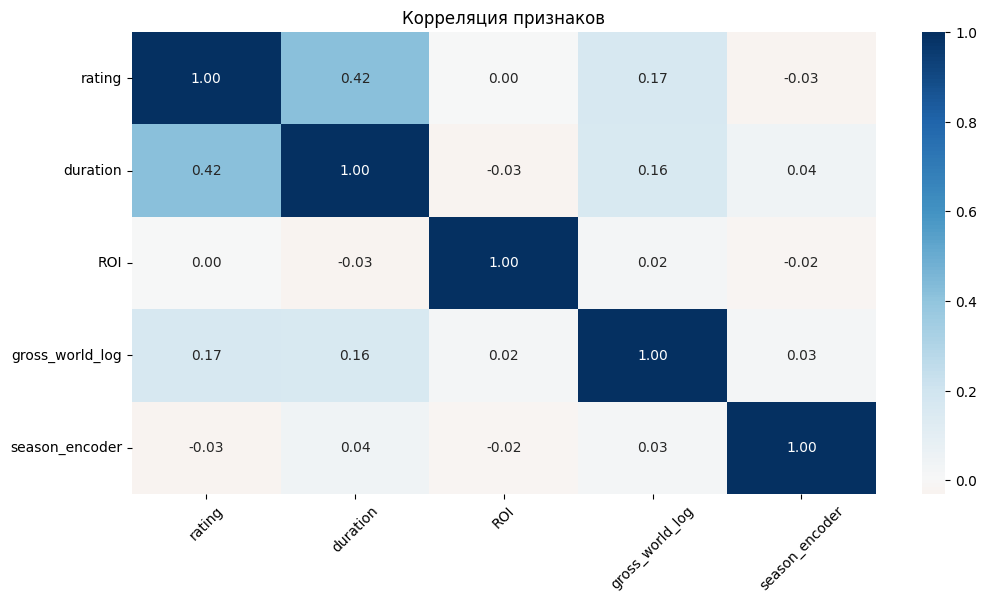

In [244]:
cols = ['rating', 'duration', 'ROI', 'gross_world_log', 'season_encoder']

df_corr = df_4corr[cols].corr()

# corr.map(lambda x: f'{x:.2f}')

plt.figure(figsize=(12, 6))

sns.heatmap(
    df_corr,
    annot=True,
    fmt='.2f',
    cmap='RdBu',
    center=0
)

plt.title('Корреляция признаков')         
plt.xticks(rotation=45)
plt.show()

Выбранные признаки слабо коррелируют друг с другом, кроме рейтинга и длительности (умеренная прямая корреляция, рассмотрим отдельно). Значит, признаки не дублируют друг друга, и в формуле успеха каждый фактор добавит свое значение. Сезон нет смысла добавлять, тк он не влияет на итоговый успех фильма. 

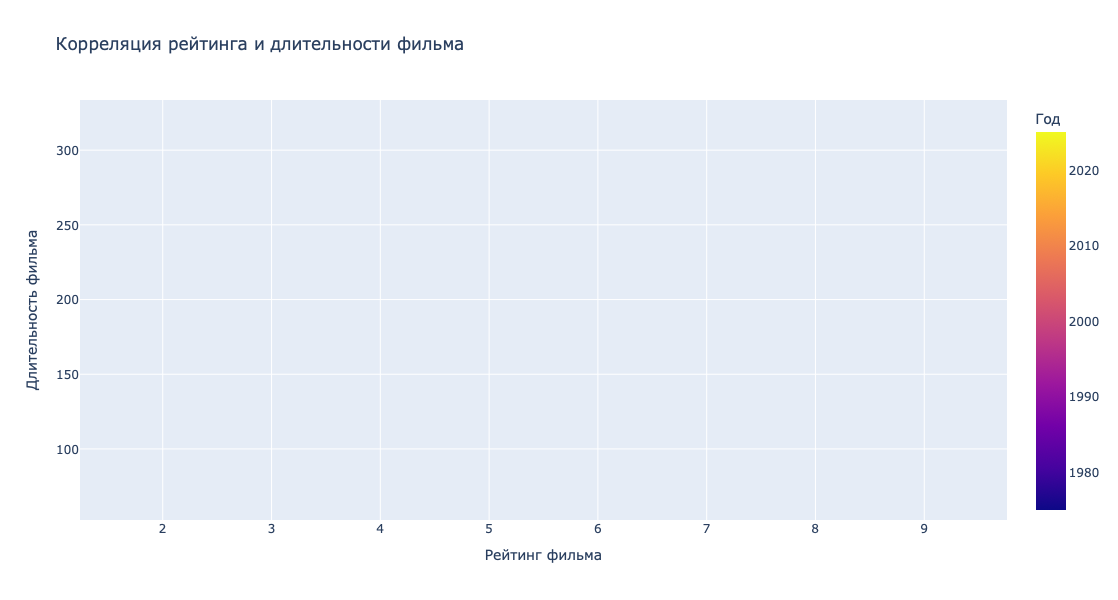

In [245]:
fig = px.scatter(
    df_4corr,
    x='rating',
    y='duration',
    color = 'year',
    opacity=0.6,
    title='Корреляция рейтинга и длительности фильма',
    labels={'duration': 'Длительность фильма', 'rating': 'Рейтинг фильма', 'year': 'Год'},
    width=1100,
    height=600
)

fig.show()

Формула успеха

$$
\text{success\_score} = 0.35*\text{rating\_norm} + 0.35*\text{gross\_world\_norm} + 0.20 *\text{ROI\_norm} + 0.10 *\text{duration\_norm}
$$


In [246]:
# нормализация 
def minmax_norm(x):
    return (x - x.min()) / (x.max() - x.min())

df_4corr['rating_norm'] = minmax_norm(df_4corr['rating'])
df_4corr['duration_norm'] = minmax_norm(df_4corr['duration'])
df_4corr['ROI_norm'] = minmax_norm(df_4corr['ROI'])
df_4corr['gross_world_norm'] = minmax_norm(df_4corr['gross_world_log'])

# метрика успеха
df_4corr['success_score'] = (0.35 * df_4corr['rating_norm'] +
                             0.35 * df_4corr['gross_world_norm'] +
                             0.20 * df_4corr['ROI_norm'] +
                             0.10 * df_4corr['duration_norm'])

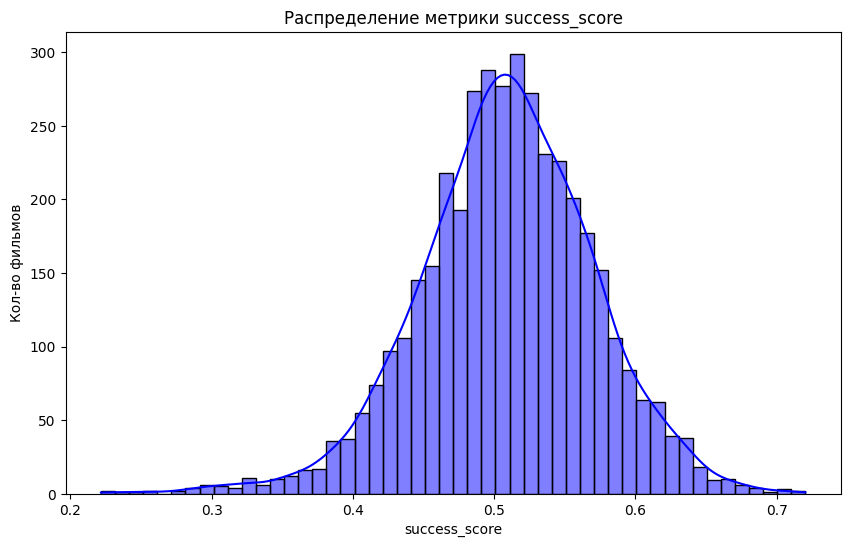

In [250]:
plt.figure(figsize=(10,6))

sns.histplot(df_4corr['success_score'],
         bins=50,
         color='blue',
         edgecolor='black',
         kde=True)
plt.title('Распределение метрики success_score')
plt.xlabel('success_score')
plt.ylabel('Кол-во фильмов')
plt.show()

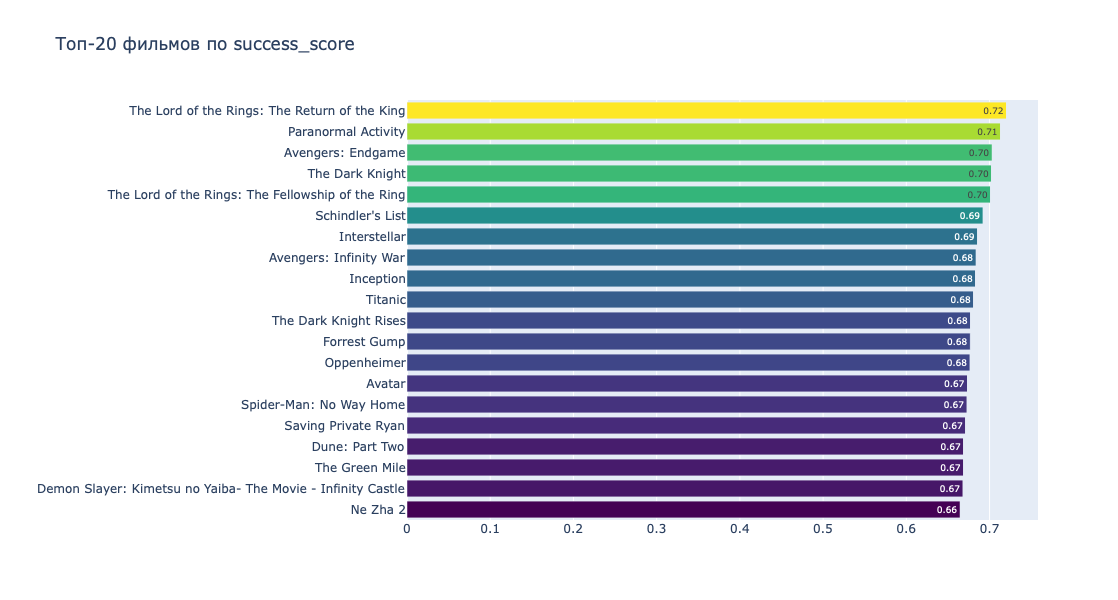

In [251]:
top20 = df_4corr.sort_values('success_score', ascending=False).head(20)

fig = px.bar(
    top20,
    x='success_score',
    y='title',
    color='success_score',
    color_continuous_scale='Viridis',
    text='success_score',
    title='Топ-20 фильмов по success_score',
    height=600,
    width=1000
)

fig.update_layout(
    xaxis_title='',
    yaxis_title='',
    yaxis=dict(autorange='reversed'), 
    coloraxis_showscale=False
)
fig.update_traces(texttemplate='%{text:.2f}', textposition='inside')
fig.show()

Самый успешный фильм по метрике - "Властелин колец: Возвращение короля". Оскар 2004 года это подтверждает (11 наград в 11 номинациях!). 

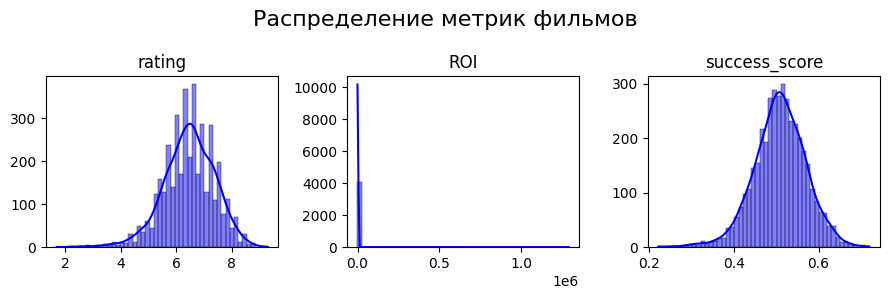

In [252]:
metrics = ['rating', 'ROI', 'success_score']

fig, axes = plt.subplots(1, 3, figsize=(9,3))  # 1 ряд, 5 колонок

for ax, metric in zip(axes, metrics):
    sns.histplot(df_4corr[metric],
                 bins=50,
                 color='blue',
                 edgecolor='black',
                 kde=True,
                 ax=ax)
    ax.set_title(metric)
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.suptitle('Распределение метрик фильмов', fontsize=16)
plt.tight_layout()
plt.show()

В метрике ROI много выбросов, данные неравномерные, для нее посчитаем медианные значения, для остальных - с нормальным распределением, - среднее. 

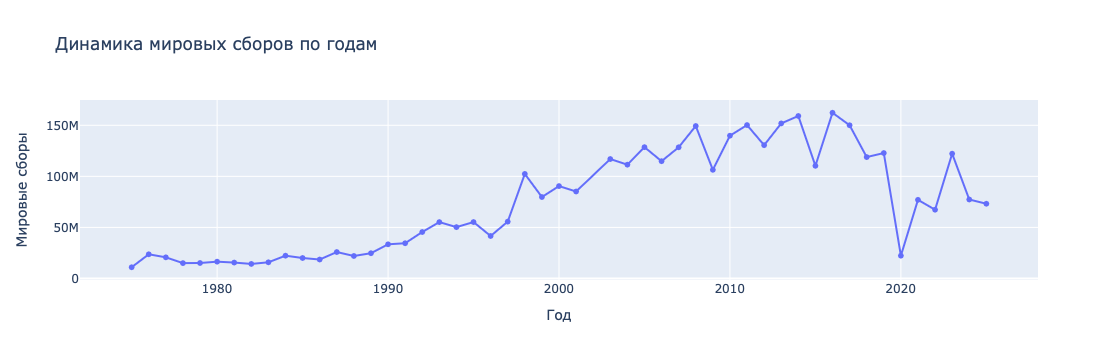

In [253]:
# Почему не стоит учитывать сборы по миру gross_world
gross_yearly = df_4corr.groupby('year')['gross_world'].median().reset_index()

fig = px.line(
    gross_yearly, 
    x='year', 
    y='gross_world', 
    markers=True,
    title='Динамика мировых сборов по годам',
    labels={'gross_world': 'Мировые сборы', 'year': 'Год'}
)

fig.show()

In [254]:
year_data = (df_4corr.groupby('year')
                    .agg({'success_score':'mean',
                          'rating':'mean',
                          'ROI':'median'
                         })
.reset_index()
)

year_data['year_score'] = (
    0.6 * year_data['success_score'] +
    0.2 * year_data['rating'] +
    0.2 * year_data['ROI']
).round(2)

display(year_data.sort_values('year_score', ascending=False).head(5))

best_year = int(year_data.sort_values('year_score', ascending=False).iloc[0]['year'])
print(f'Лучший год: {best_year}.')

,year,success_score,rating,ROI,year_score
43,2019,0.531152,6.580808,296.521358,60.94
41,2017,0.529025,6.493000,266.791251,54.97
38,2014,0.534799,6.602000,266.250977,54.89
39,2015,0.525982,6.494000,259.050709,53.42
42,2018,0.526294,6.448980,252.573162,52.12


Лучший год: 2019.


Самый успешный год - 2019, его годовая оценка составляет 60.94 балла. На втором месте с большим отрывом идет 2017. В топ-5 входят только годы из 2010-ых.

In [255]:
best_year_df = df_4corr[df_4corr['year'] == best_year]

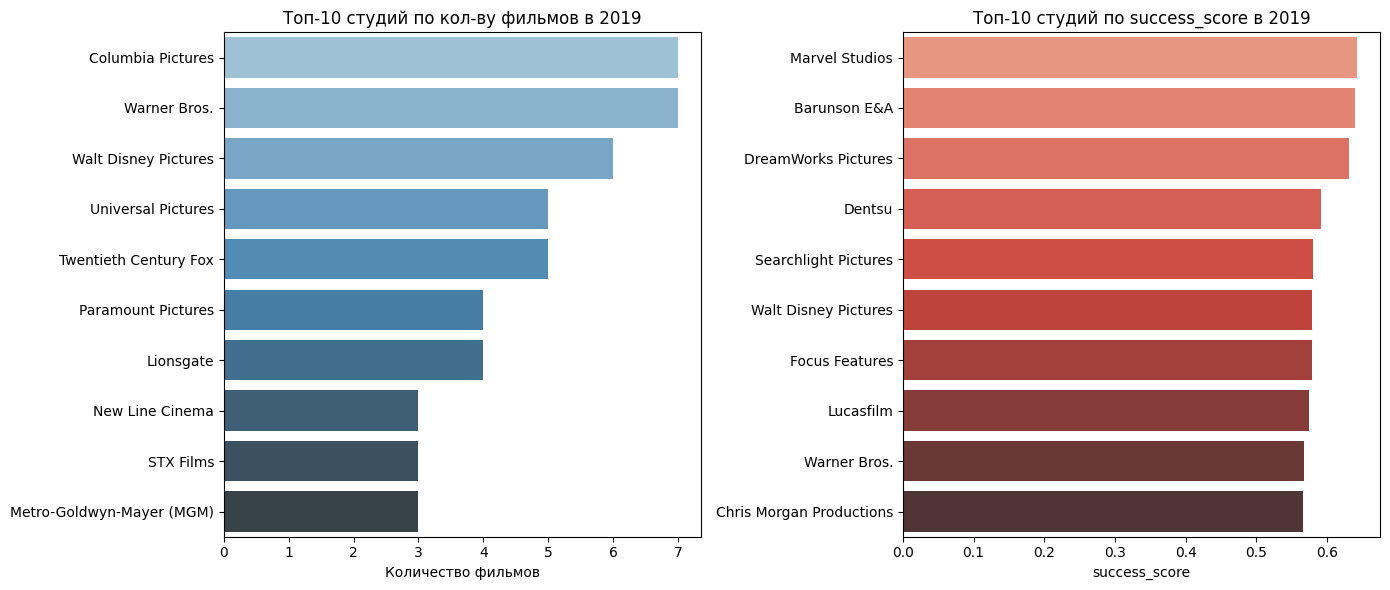

In [256]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.barplot(x=best_year_df['company'].value_counts().head(10).values,
            y=best_year_df['company'].value_counts().head(10).index,
            ax=axes[0],
            palette='Blues_d'
           )
axes[0].set_title(f'Топ-10 студий по кол-ву фильмов в {best_year}')
axes[0].set_xlabel('Количество фильмов')
axes[0].set_ylabel('')

company_success = best_year_df.groupby('company')['success_score'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=company_success.values,
            y=company_success.index,
            ax=axes[1],
            palette='Reds_d'
           )
axes[1].set_title(f'Топ-10 студий по success_score в {best_year}')
axes[1].set_xlabel('success_score')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


Больше всего фильмов вышли в 2019 году у Columbia Pictures и Warner Bros. (по 7 у каждой), в топ-3 так же Walt Disney Pictures (6 фильмов) и Universal Pictures, Twentieth Century Fox (5 фильмов) - все это крупные киностудии. 
Однако, если посмотреть на метрику успеха, то в самой успешной киностудией в 2019 году была Marvel Studios, хотя у нее вышло всего 2 фильма, они оказались успешными. Так же привлекает внимание киностудия Barunson E&A с 1 фильмом. Именно она выпустила фильм "Паразиты", который получил Оскар. Заслуженный успех :)

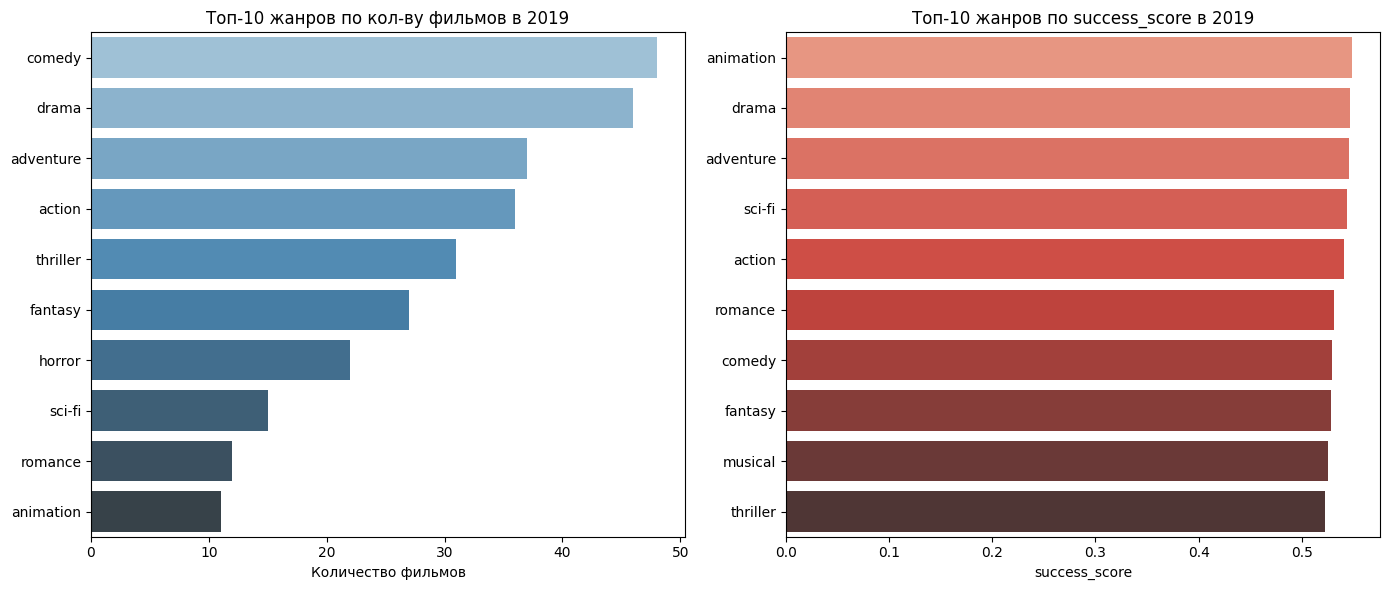

In [257]:
genres_expanded = best_year_df.explode('genre_base')

fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.barplot(x=genres_expanded['genre_base'].value_counts().head(10).values,
            y=genres_expanded['genre_base'].value_counts().head(10).index,
            ax=axes[0],
            palette='Blues_d'
           )
axes[0].set_title(f'Топ-10 жанров по кол-ву фильмов в {best_year}')
axes[0].set_xlabel('Количество фильмов')
axes[0].set_ylabel('')

genre_success = genres_expanded.groupby('genre_base')['success_score'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=genre_success.values,
            y=genre_success.index,
            ax=axes[1],
            palette='Reds_d'
           )
axes[1].set_title(f'Топ-10 жанров по success_score в {best_year}')
axes[1].set_xlabel('success_score')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


In [258]:
(genres_expanded[genres_expanded['genre_base'] == 'animation'][['title', 'success_score']]
    .sort_values('success_score', ascending=False)
    .head(3)
)

,title,success_score
4179,Toy Story 4,0.613777
4176,The Lion King,0.593156
4190,How to Train Your Dragon: The Hidden World,0.592079


По количеству жанров лидирует комедия и драма (более 45 фильмов), в топ-3 входит так же жанр приключения (37 фильмов). Но самым успешным жанром в 2019 году оказалась анимация. В этот год выши "История игрушек 4" (опять же, Оскар!), "Король лев", "Как приручить дракона" и другие известные анимационные фильмы. 

In [259]:
print("Фильм с самым высоким рейтингом: {}. рейтинг: {}".format(
        best_year_df.sort_values('rating', ascending=False).iloc[0]['title'],
        best_year_df.sort_values('rating', ascending=False).iloc[0]['rating']
    )
)

print("Фильм с самым высоким ROI: {}. ROI: {}".format(
        best_year_df.sort_values('ROI', ascending=False).iloc[0]['title'],
        best_year_df.sort_values('ROI', ascending=False).iloc[0]['ROI'].round(2)
    )
)
print(
    "Самый успешный фильм: {}. success_score: {}".format(
        best_year_df.sort_values('success_score', ascending=False).iloc[0]['title'],
        best_year_df.sort_values('success_score', ascending=False).iloc[0]['success_score'].round(2)
    )
)

Фильм с самым высоким рейтингом: Parasite. рейтинг: 8.5
Фильм с самым высоким ROI: Parasite. ROI: 2203.07
Самый успешный фильм: Avengers: Endgame. success_score: 0.7


## 2019 год — лучший год в истории кино

На основании анализа выше, лучшим годом в кино оказался 2019.
В этом году наблюдалась высокая концентрация успешных фильмов с высокими оценками зрителей и хорошей окупаемостью.

Анализ студий показал, что топовые студии в 2019 году не только выпускали больше фильмов, но и добивались высокого среднего success_score, что свидетельствует о стратегически удачном выборе проектов.

По жанрам можно отметить, что доминировали классические жанры в виде комедий и драм, однако большего успеха добились фильме в жанре анимация.

В этом году вышло множество успешных фильмов, которые получили признание критиков и публики:
- Avengers: Endgame (Marvel Studios) — фильм с рекордными сборами, ставший кульминацией всей саги Marvel, сочетавший action и adventure.
- Joker (Warner Bros.) — драматический триллер, который вызвал широкий резонанс и получил высокую оценку критиков.
- Parasite (Barunson E&A) — международный успех, получивший Оскар за лучший фильм, доказавший, что качественное кино может так же быть коммерчески успешным.
- The Lion King (Walt Disney Pictures) и Frozen II	 (Walt Disney Pictures) — анимационные хиты, которые объединили зрительский успех и высокие рейтинги.

В целом, 2019 год характеризуется как год качественных и коммерчески успешных фильмов, объединяющий популярность среди зрителей и финансовую отдачу для студий.

## Формула успешного кино 
### Вот тут я очень сомневаюсь, что это нужно добавлять


На основе данных по всем фильмам и рассчитанной метрики success_score найдем итоговый профиль успешного фильма. 

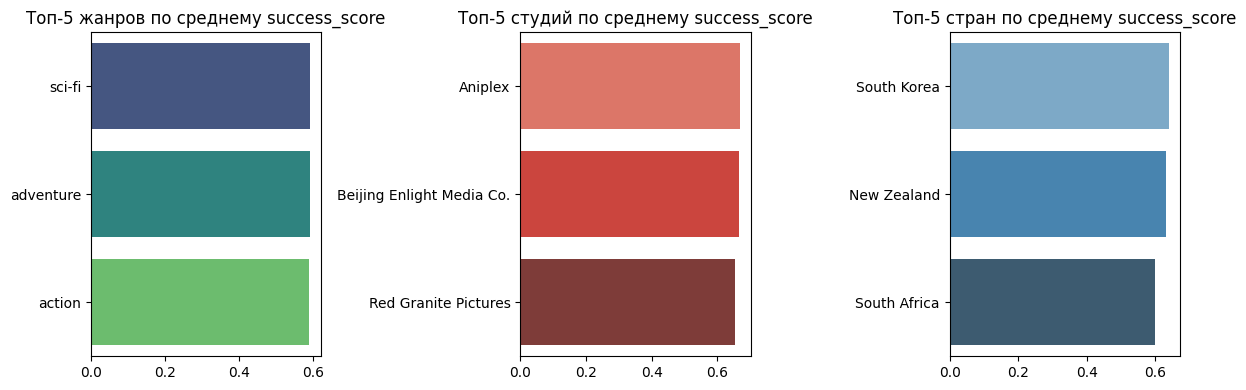

In [260]:
threshold = df_4corr['success_score'].quantile(0.75)  # берем только успешные фильмы
successful_films = df_4corr[df_4corr['success_score'] >= threshold]

genres_all = successful_films.explode('genre_base')
top_genres_score = genres_all.groupby('genre_base')['success_score'].mean().sort_values(ascending=False).head(3)

top_comp_score = successful_films.groupby('company')['success_score'].mean().sort_values(ascending=False).head(3)
top_countries_score = successful_films.groupby('origin_country')['success_score'].mean().sort_values(ascending=False).head(3)

fig, axes = plt.subplots(1, 3, figsize=(12,4))

sns.barplot(x=top_genres_score.values, y=top_genres_score.index, palette='viridis', ax=axes[0])
axes[0].set_title("Топ-5 жанров по среднему success_score")
axes[0].set_ylabel("")
axes[0].set_xlabel("")

sns.barplot(x=top_comp_score.values, y=top_comp_score.index, palette='Reds_d', ax=axes[1])
axes[1].set_title("Топ-5 студий по среднему success_score")
axes[1].set_ylabel("")
axes[1].set_xlabel("")

sns.barplot(x=top_countries_score.values, y=top_countries_score.index, palette='Blues_d', ax=axes[2])
axes[2].set_title("Топ-5 стран по среднему success_score")
axes[2].set_ylabel("")
axes[2].set_xlabel("")

plt.tight_layout()
plt.show()


In [261]:
print(f'Средняя длительность успешного фильма: {int(successful_films['duration'].mean().round(0))} минут.')
print(f'Медианный бюджет успешного фильма: $ {int(successful_films['budget'].median()):,}.')

Средняя длительность успешного фильма: 125 минут.
Медианный бюджет успешного фильма: $ 52,000,000.


## Профиль успешного фильма

На основе анализа фильмов с высоким success_score был составлен итоговый профиль успешного фильма.

1. Бюджет. Большинство успешных фильмов имеют крупный бюджет, что позволяет реализовать высококачественные спецэффекты, пригласить известных актеров и обеспечить широкую дистрибуцию, однако есть проекты с более консервативным бюджетом.
2. Длительность фильма. Оптимальная продолжительность успешных фильмов - около 2 часов. Это достаточно для раскрытия сюжета, но не слишком длинно, чтобы терять внимание аудитории.
3. Жанры. Жанры sci-fi, action, adventure чаще всего имеют успех. Вероятно, динамичные сюжеты, зрелищные сцены и массовая аудитория способствуют коммерческому успеху.
4. Киностудии. Не всегда большие киностудии - залог успеха. Можно снимать в инди-киностудиях.
5. Страны. Больше всего зрителям нравятся фильмы из Южной Кореи и Новой Зеландии.

Формула успешного кино

- Длительность фильма: 125 минут.
- Бюджет: 52 млн долларов.
- Съемки в Южной Корее или Новой Зеландии
- Жанр sci-fi, action, adventure.
- Студия - любая, даже инди. 

In [207]:
# successful_films['duration'].describe()

count    1015.000000
mean      125.481773
std        22.050986
min        76.000000
25%       110.000000
50%       124.000000
75%       137.000000
max       216.000000
Name: duration, dtype: float64

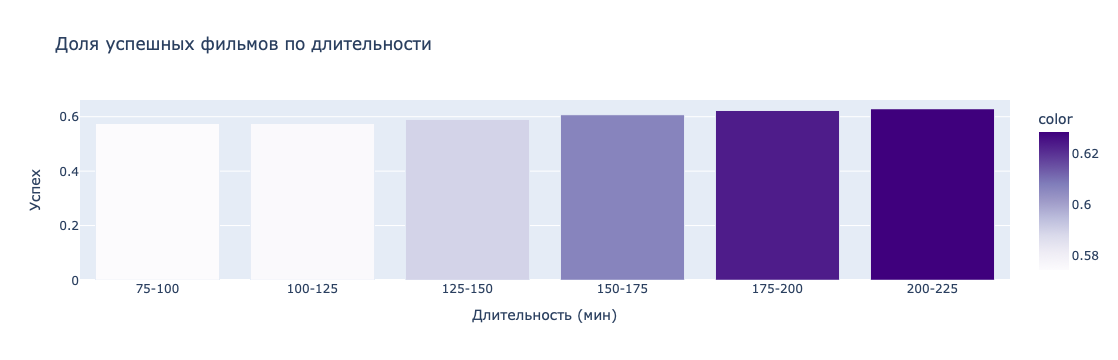

In [223]:
# duration_top = successful_films.copy()
# bins_duration = range(75, 230, 25)
# duration_top['duration_bin'] = pd.cut(successful_films['duration'], bins=bins_duration)
# top_duration_score = duration_top.groupby('duration_bin')['success_score'].mean()

# top_duration_score.index = [f"{int(interval.left)}-{int(interval.right)}" for interval in top_duration_score.index]


# fig = px.bar(
#     x=top_duration_score.index.astype(str),
#     y=top_duration_score.values,
#     labels={'x':'Длительность (мин)', 'y':'Успех'},
#     title="Доля успешных фильмов по длительности",
#     color=top_duration_score.values,
#     color_continuous_scale='Purples'
# )
# fig.show()

In [225]:
# successful_films['duration'].mean()

125.48177339901478

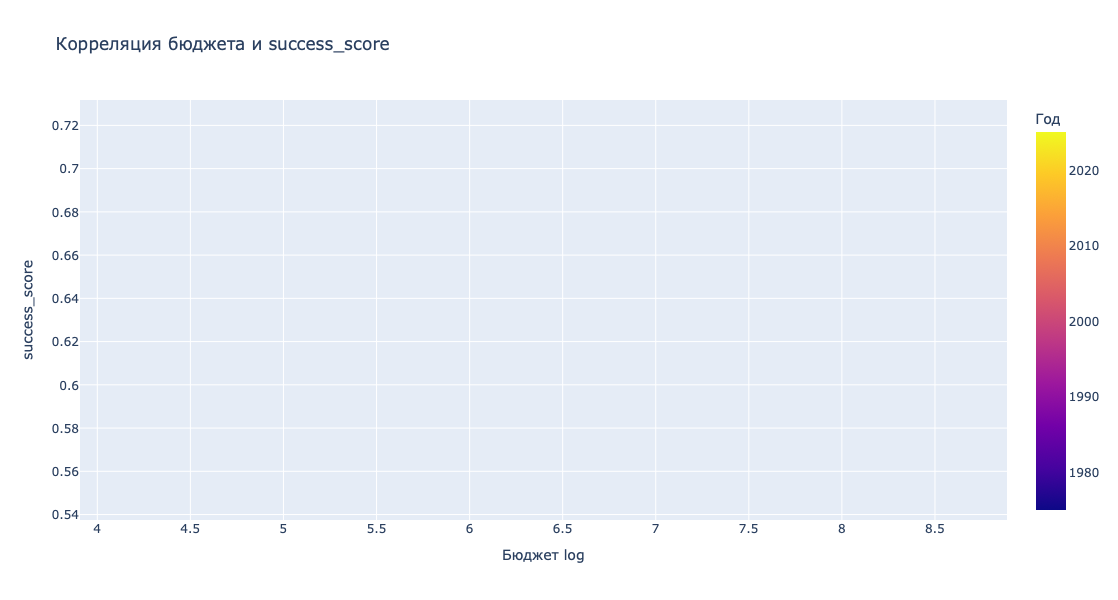

In [215]:
# successful_films['budget_log'] = successful_films['budget'].apply(lambda x: np.log10(x) if x > 0 else 0)
# fig = px.scatter(
#     successful_films,
#     x='budget_log',
#     y='success_score'
#     color = 'year',
#     opacity=0.6,
#     title='Корреляция бюджета и success_score',
#     labels={'budget_log': 'Бюджет log', 'year': 'Год'},
#     width=1100,
#     height=600
# )

# fig.show()